# Concise Implementation of Recurrent Neural Networks

http://d2l.ai/chapter_recurrent-neural-networks/rnn-concise.html

In [13]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [14]:
class RNN(d2l.Module):  #@save
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

In [15]:
class RNNLM(d2l.RNNLMScratch):  #@save
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

In [16]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)


In [25]:
len(data.vocab)

28

In [17]:
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)

/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [18]:
model.predict('it has', 20, data.vocab)

'it hasqlqlqlqlqlqlqlqlqlql'

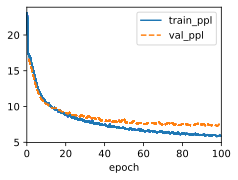

In [19]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [20]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has a domensimensions o'

In [5]:
pip install d2l==1.0.0b0

Note: you may need to restart the kernel to use updated packages.
